<a href="https://colab.research.google.com/github/mehreengillani/Data602/blob/main/assignment_09_Mehreen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**
Mehreen Ali Gillani

In [3]:
# core
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [4]:
# Load datasets here once and assign to variables iris and housing

iris = ds.load_iris()
# The boston dataset has been removed from scikit-learn due to ethical concerns.
# We will use the California housing dataset as an alternative.
housing = ds.fetch_california_housing()

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Get target names as list
target_names = list(iris.target_names)
print("First 5 rows:")
print(iris_df.head(5))
print("\nTarget names:", target_names)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target names: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [7]:
# define new_observations

new_observations = [[5.3, 3.7, 1.7, 0.4], [6.2, 2.5, 4.5, 1.3], [4.2, 2.5, 2.5, 1.7]]

# Then predict
knn = KNN(n_neighbors=5)
knn.fit(iris.data, iris.target)
predictions = knn.predict(new_observations) #predict for new_observation
result = [iris.target_names[p] for p in predictions] # for each prediction get target name

print(result)

[np.str_('setosa'), np.str_('versicolor'), np.str_('versicolor')]


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [8]:
from sklearn.metrics import accuracy_score

def get_accuracy(split, neighbors):
    X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=split)
    knn = KNN(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

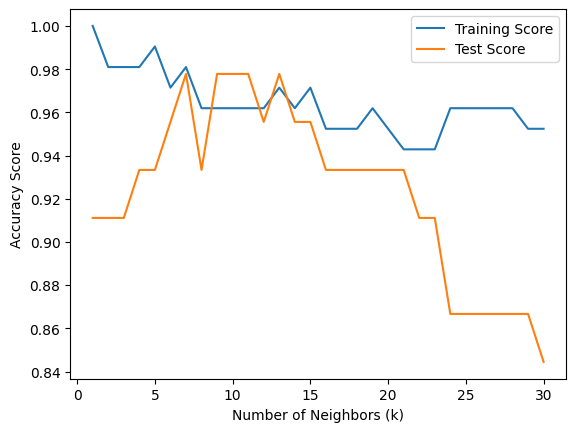

In [9]:
# Split the data into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=0.3)

# Create empty lists to store accuracy scores
train_scores = []
test_scores = []
# Create a range of k values from 1 to 30
k_range = range(1, 31)

# lood through k value 1 to 30
for k in k_range:
    # Create a kNN model with k neighbors
    knn = KNN(n_neighbors=k)
    # Train the model using training data
    knn.fit(X_train, y_train)
    # Calculate accuracy on training data and add to list
    train_scores.append(knn.score(X_train, y_train))
    # Calculate accuracy on test data and add to list
    test_scores.append(knn.score(X_test, y_test))
# Plot training scores as a line
plt.plot(k_range, train_scores, label='Training Score')
# Plot test scores as a line
plt.plot(k_range, test_scores, label='Test Score')
# Label the x-axis
plt.xlabel('Number of Neighbors (k)')
# Label the y-axis
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [10]:
# Create a table with k values and both scores
results = pd.DataFrame({
    'k': k_range,
    'train_score': train_scores,
    'test_score': test_scores
})

# Calculate the difference between train and test scores
results['difference'] = abs(results['train_score'] - results['test_score'])

# Find k values with smallest difference (most balanced)
min_diff = results['difference'].min()
best_balanced_k = results[results['difference'] == min_diff]

print("K values with minimum difference between train and test scores:")
print(best_balanced_k)

K values with minimum difference between train and test scores:
   k  train_score  test_score  difference
6  7     0.980952    0.977778    0.003175


What the chart shows:

When k=1: High training accuracy, lower test accuracy = Overfitting
When k=30: Lower training accuracy, lower test accuracy = Underfitting
The best k is where test accuracy is highest (usually when k=6,7)